In [0]:
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


In [0]:
%cd drive/My Drive/facial-keypoints-detection
!ls

/content/drive/My Drive/facial-keypoints-detection
IdLookupTable.csv	model_cnn.h5	      test.zip
model_attention_3M.h5	model_fnn.h5	      training.csv
model_attention.h5	SampleSubmission.csv  training.zip
model_cnn_full_data.h5	test.csv


In [0]:
import os
print(os.listdir())

['SampleSubmission.csv', 'IdLookupTable.csv', 'training.zip', 'training.csv', 'test.csv', 'test.zip', 'model_cnn.h5', 'model_fnn.h5', 'model_attention.h5', 'model_attention_3M.h5', 'model_cnn_full_data.h5']


In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import clear_output
from time import sleep
import os

Train_Dir = 'training.csv'
Test_Dir = 'test.csv'
lookid_dir = 'IdLookupTable.csv'
train_data = pd.read_csv(Train_Dir)  
test_data = pd.read_csv(Test_Dir)
lookid_data = pd.read_csv(lookid_dir)
print(os.listdir())

train_data.isnull().any().value_counts()
train_data.fillna(method = 'ffill',inplace = True)
train_data.isnull().any().value_counts()

imag = []
for i in range(0,7049):
    img = train_data['Image'][i].split(' ')
    img = ['0' if x == '' else x for x in img]
    img = img
    # print(type(img))
    imag.append(img)

image_list = np.array(imag,dtype = 'float')
image_list = image_list/255.
X_train = image_list
# X_train = image_list.reshape(-1,96,96,1)


training = train_data.drop('Image',axis = 1)

y_train = []
for i in range(0,7049):
    y = training.iloc[i,:]
    y = (y - 48) / 48
    y_train.append(y)
y_train = np.array(y_train,dtype = 'float')

['SampleSubmission.csv', 'IdLookupTable.csv', 'training.zip', 'training.csv', 'test.csv', 'test.zip', 'model_cnn.h5', 'model_fnn.h5', 'model_attention.h5', 'model_attention_3M.h5', 'model_cnn_full_data.h5']


In [0]:
print(X_train.shape, X_train[10])

(7049, 9216) [0.20392157 0.2        0.21176471 ... 0.75686275 0.74509804 0.73333333]


In [0]:
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import SGD
from keras.layers import Dropout

Using TensorFlow backend.


In [0]:
def Fully_Connected_NN():
    model = Sequential()
    model.add(Dense(512,input_dim=X_train.shape[1]))
    model.add(Activation('relu'))
    model.add(Dropout(0.1))
    model.add(Dense(128))
    model.add(Activation('relu'))
    model.add(Dropout(0.2))
    model.add(Dense(64))
    model.add(Activation('relu'))
    model.add(Dropout(0.2))
    model.add(Dense(30))

    model.summary()

    sgd = SGD(lr=0.01, momentum=0.9, nesterov=True)
    model.compile(loss='mean_squared_error', optimizer=sgd)

    return(model)

In [0]:
model_fnn = Fully_Connected_NN()
hist_fnn = model_fnn.fit(X_train, y_train, nb_epoch=50,batch_size=128, validation_split=0.2)




Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               4719104   
_________________________________________________________________
activation_1 (Activation)    (None, 512)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               65664     
_________________________________________________________________
activation_2 (Activation)    (None, 128)               0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
__

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  





Train on 5639 samples, validate on 1410 samples
Epoch 1/50





5639/5639 [==============================] - 6s 1ms/step - loss: 0.0963 - val_loss: 0.0194
Epoch 2/50
5639/5639 [==============================] - 1s 135us/step - loss: 0.0323 - val_loss: 0.0119
Epoch 3/50
5639/5639 [==============================] - 1s 136us/step - loss: 0.0228 - val_loss: 0.0089
Epoch 4/50
5639/5639 [==============================] - 1s 138us/step - loss: 0.0183 - val_loss: 0.0066
Epoch 5/50
5639/5639 [==============================] - 1s 142us/step - loss: 0.0156 - val_loss: 0.0059
Epoch 6/50
5639/5639 [==============================] - 1s 138us/step - loss: 0.0137 - val_loss: 0.0067
Epoch 7/50
5639/5639 [==============================] - 1s 138us/step - loss: 0.0123 - val_loss: 0.0051
Epoch 8/50
5639/5639 [==============================] - 1s 141us/step - loss: 0.0109 - val_loss: 0.0046
Epoch 9/50
5639/5639 [==============================] - 1s 137us/step - loss: 0.0100 - val_loss: 0.0038
Epoch 10/5

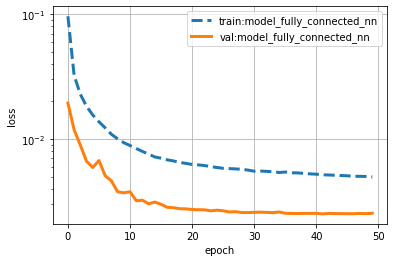

In [0]:
def plot_loss(hist,name,plt,RMSE_TF=False):
    loss = hist['loss']
    val_loss = hist['val_loss']
    if RMSE_TF:
        loss = np.sqrt(np.array(loss))*48 
        val_loss = np.sqrt(np.array(val_loss))*48 
        
    plt.plot(loss,"--",linewidth=3,label="train:"+name)
    plt.plot(val_loss,linewidth=3,label="val:"+name)

plot_loss(hist_fnn.history,"model_fully_connected_nn",plt)
plt.legend()
plt.grid()
plt.yscale("log")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.show()

In [0]:
timag = []
for i in range(0,1783):
    timg = test_data['Image'][i].split(' ')
    timg = ['0' if x == '' else x for x in timg]
    
    timag.append(timg)

timage_list = np.array(timag,dtype = 'float')
timage_list = timage_list/255.
X_test = timage_list
# X_test = timage_list.reshape(-1,96,96,1)

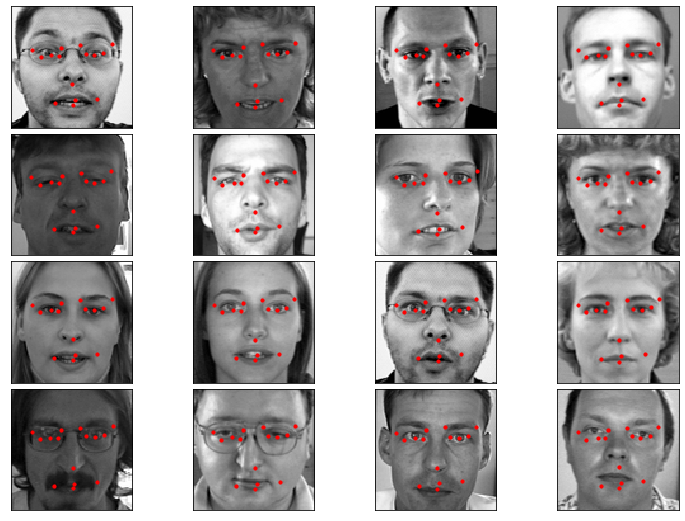

In [0]:
import matplotlib.pyplot as plt

pred = model_fnn.predict(X_test)

def plot_sample(x, y, axis):
    img = x.reshape(96, 96)
    axis.imshow(img, cmap='gray')
    axis.scatter(y[0::2]*48+48, y[1::2]*48+48, marker='o', s=10, c='red')

fig = plt.figure(figsize=(10, 7))
fig.subplots_adjust(
    left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

for i in range(16):
    axis = fig.add_subplot(4, 4, i+1, xticks=[], yticks=[])
    plot_sample(X_test[i], pred[i], axis)

plt.show()

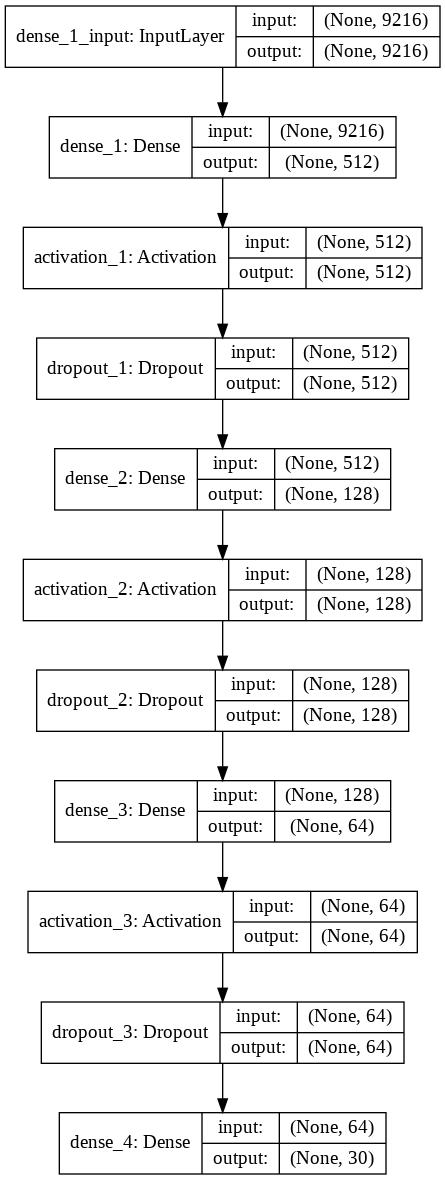

In [0]:
from keras.utils import plot_model
# from keras.utils.vis_utils import plot_model
plot_model(model_fnn, to_file='model_fnn.png', show_shapes=True, show_layer_names=True)
from IPython.display import Image
Image(retina=True, filename='model_fnn.png')

In [0]:
from keras.models import load_model
model_fnn.save('model_fnn.h5') 

model_fnn = load_model('model_fnn.h5')